In [54]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [55]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random

In [56]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [57]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [58]:
tf.keras.backend.clear_session()

In [59]:
subject = 'Acre - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [63]:
data = pd.read_csv('2003_raw_Acre_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Acre - PIB - Per Capita,Acre - PIB - Preços de Mercado,Acre - PIB - Estadual,Acre - PIB - Construção Civil,Acre - População,Acre - INCC (%),Acre - IPCA - Variação mensal durante o Plano Real (%),Acre - IGP-DI,Acre - Taxa Selic (%),Acre - IDH - Longevidade,Acre - IDH - Renda,Acre - IDH - Educação,Acre - NFSP - Fluxo Mensal (Milhões de reais),Acre - Estoque liquido de capital fixo - (R$),Acre - Desemprego,Acre - Produção de Cimento (t),Acre - Valor,Acre - Consumo de Cimento (t)
0,2003-01-01,434223.352964,2.285692e+05,0.739806,506500.171013,586942.0,1.70,12.53,2.70,0.082293,0.694,0.612,0.325,3.46,6.098524e+06,6.582788,NaN,NaN,3260.0
1,2003-02-01,434223.352964,2.285692e+05,0.739806,506500.171013,586942.0,1.51,2.25,2.17,0.088771,0.694,0.612,0.325,3.59,6.172460e+06,6.582788,NaN,NaN,2191.0
2,2003-03-01,434223.352964,2.285692e+05,0.739806,506500.171013,586942.0,1.39,3.86,1.59,0.090733,0.694,0.612,0.325,3.84,6.172460e+06,6.582788,NaN,NaN,2154.0
3,2003-04-01,434223.352964,2.285692e+05,0.739806,506500.171013,586942.0,1.38,5.13,1.66,0.092749,0.694,0.612,0.325,3.95,6.172460e+06,6.582788,34655.0,NaN,2643.0
4,2003-05-01,434223.352964,2.285692e+05,0.739806,506500.171013,586942.0,0.90,6.15,0.41,0.092758,0.694,0.612,0.325,4.06,6.172460e+06,6.582788,172597.0,NaN,2546.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,672756.979576,1.135171e+06,0.773938,308058.059562,869265.0,0.58,2.42,-0.01,0.024620,0.820,0.660,0.680,0.69,7.827728e+06,12.300000,539583.0,NaN,16723.0
200,2019-09-01,672756.979576,1.135171e+06,0.773938,308058.059562,869265.0,0.42,2.54,-0.51,0.022751,0.820,0.660,0.680,0.62,7.827728e+06,12.000000,78335.0,NaN,15253.0
201,2019-10-01,672756.979576,1.135171e+06,0.773938,308058.059562,869265.0,0.46,2.49,0.50,0.022035,0.820,0.660,0.680,0.59,7.827728e+06,11.900000,218485.0,NaN,16531.0
202,2019-11-01,672756.979576,1.135171e+06,0.773938,308058.059562,869265.0,0.18,2.60,0.55,0.020790,0.820,0.660,0.680,0.57,7.827728e+06,11.700000,116943.0,NaN,15206.0


In [85]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      5.807
1      5.242
2      4.965
3      5.854
4      5.892
       ...  
199      NaN
200      NaN
201      NaN
202      NaN
203      NaN
Name: Acre - Consumo de Cimento (t), Length: 204, dtype: float64

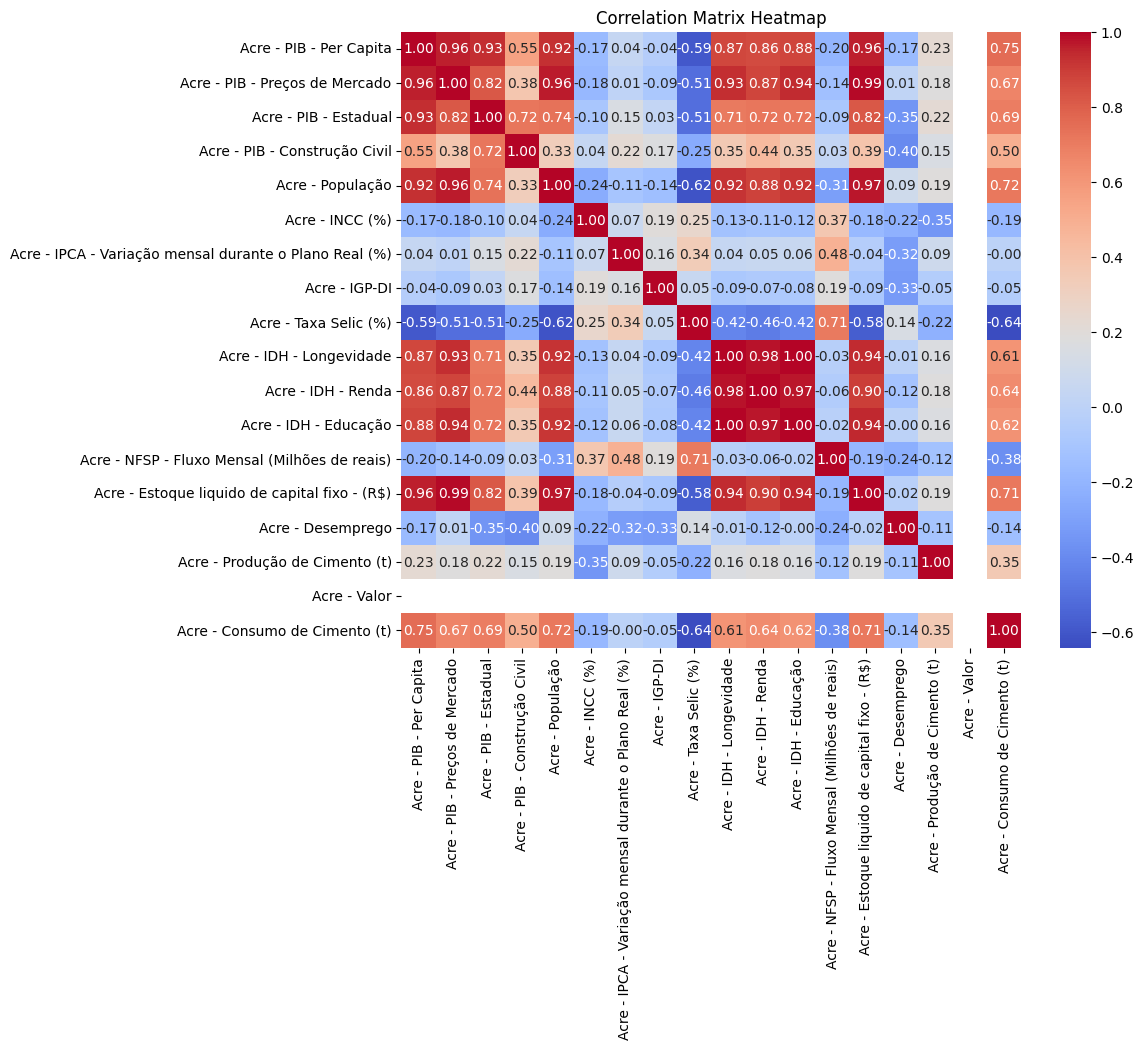

In [86]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [90]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(-1.0)
input_data

,Acre - PIB - Per Capita,Acre - PIB - Preços de Mercado,Acre - PIB - Estadual,Acre - PIB - Construção Civil,Acre - População,Acre - INCC (%),Acre - IPCA - Variação mensal durante o Plano Real (%),Acre - IGP-DI,Acre - Taxa Selic (%),Acre - IDH - Longevidade,Acre - IDH - Renda,Acre - IDH - Educação,Acre - NFSP - Fluxo Mensal (Milhões de reais),Acre - Estoque liquido de capital fixo - (R$),Acre - Desemprego,Acre - Produção de Cimento (t),Acre - Valor
0,-1.364248,-1.297224,-0.837283,0.166877,-1.717501,1.998868,4.052332,3.466715,2.303195,-0.917260,-0.935383,-0.909598,3.108599,-1.539424,-0.793931,-1.000000,-1.0
1,-1.364248,-1.297224,-0.837283,0.166877,-1.717501,1.647487,-0.596188,2.630940,2.745235,-0.917260,-0.935383,-0.909598,3.275709,-1.411460,-0.793931,-1.000000,-1.0
2,-1.364248,-1.297224,-0.837283,0.166877,-1.717501,1.425561,0.131839,1.716318,2.879123,-0.917260,-0.935383,-0.909598,3.597074,-1.411460,-0.793931,-1.000000,-1.0
3,-1.364248,-1.297224,-0.837283,0.166877,-1.717501,1.407068,0.706121,1.826703,3.016721,-0.917260,-0.935383,-0.909598,3.738475,-1.411460,-0.793931,-1.092796,-1.0
4,-1.364248,-1.297224,-0.837283,0.166877,-1.717501,0.519367,1.167355,-0.144465,3.017322,-0.917260,-0.935383,-0.909598,3.879875,-1.411460,-0.793931,-0.020628,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.766452,1.557200,0.000945,-0.816548,1.530651,-0.590259,-0.966985,-1.264088,-0.729479,1.503999,1.039819,1.453393,-0.374997,1.441346,2.233992,2.997615,-1.0
176,0.766452,1.557200,0.000945,-0.816548,1.530651,-0.479297,-0.881068,-0.412544,-0.941281,1.503999,1.039819,1.453393,-0.439270,1.441346,2.233992,-0.566777,-1.0
177,0.766452,1.557200,0.000945,-0.816548,1.530651,-1.034110,-0.808718,0.186692,-1.140710,1.503999,1.039819,1.453393,-0.503543,1.441346,2.233992,-0.215316,-1.0
178,0.766452,1.557200,0.000945,-0.816548,1.530651,-0.571766,-0.614276,-0.633314,-1.226481,1.503999,1.039819,1.453393,-0.503543,1.441346,2.290938,-0.511615,-1.0


In [91]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Acre - PIB - Per Capita,Acre - PIB - Preços de Mercado,Acre - PIB - Estadual,Acre - PIB - Construção Civil,Acre - População,Acre - INCC (%),Acre - IPCA - Variação mensal durante o Plano Real (%),Acre - IGP-DI,Acre - Taxa Selic (%),Acre - IDH - Longevidade,Acre - IDH - Renda,Acre - IDH - Educação,Acre - NFSP - Fluxo Mensal (Milhões de reais),Acre - Estoque liquido de capital fixo - (R$),Acre - Desemprego,Acre - Produção de Cimento (t),Acre - Valor
0,-1.364248,-1.297224,-0.837283,0.166877,-1.717501,1.998868,4.052332,3.466715,2.303195,-0.917260,-0.935383,-0.909598,3.108599,-1.539424,-0.793931,-1.000000,-1.0
1,-1.364248,-1.297224,-0.837283,0.166877,-1.717501,1.647487,-0.596188,2.630940,2.745235,-0.917260,-0.935383,-0.909598,3.275709,-1.411460,-0.793931,-1.000000,-1.0
2,-1.364248,-1.297224,-0.837283,0.166877,-1.717501,1.425561,0.131839,1.716318,2.879123,-0.917260,-0.935383,-0.909598,3.597074,-1.411460,-0.793931,-1.000000,-1.0
3,-1.364248,-1.297224,-0.837283,0.166877,-1.717501,1.407068,0.706121,1.826703,3.016721,-0.917260,-0.935383,-0.909598,3.738475,-1.411460,-0.793931,-1.092796,-1.0
4,-1.364248,-1.297224,-0.837283,0.166877,-1.717501,0.519367,1.167355,-0.144465,3.017322,-0.917260,-0.935383,-0.909598,3.879875,-1.411460,-0.793931,-0.020628,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.239429,1.540561,0.918102,-0.128162,1.344396,-0.238878,0.629248,-1.406012,0.272188,1.311835,1.073875,1.269264,0.794771,1.416222,0.525622,-1.000000,-1.0
164,1.239429,1.540561,0.918102,-0.128162,1.344396,-0.608753,0.837256,-0.112926,0.272188,1.311835,1.073875,1.269264,0.730498,1.416222,0.582567,-1.000000,-1.0
165,1.239429,1.540561,0.918102,-0.128162,1.344396,-0.534778,0.877953,-0.743700,0.272188,1.311835,1.073875,1.269264,0.743353,1.416222,0.639513,-1.000000,-1.0
166,1.239429,1.540561,0.918102,-0.128162,1.344396,-0.756703,1.000045,-0.586006,0.248413,1.311835,1.073875,1.269264,0.614807,1.416222,0.639513,-1.000000,-1.0


In [92]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0       5.807
1       5.242
2       4.965
3       5.854
4       5.892
        ...  
163    15.749
164    14.269
165    15.367
166    14.595
167     9.811
Name: Acre - Consumo de Cimento (t), Length: 168, dtype: float64

In [93]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [94]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [95]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Acre - PIB - Per Capita,Acre - PIB - Preços de Mercado,Acre - PIB - Estadual,Acre - PIB - Construção Civil,Acre - População,Acre - INCC (%),Acre - IPCA - Variação mensal durante o Plano Real (%),Acre - IGP-DI,Acre - Taxa Selic (%),Acre - IDH - Longevidade,Acre - IDH - Renda,Acre - IDH - Educação,Acre - NFSP - Fluxo Mensal (Milhões de reais),Acre - Estoque liquido de capital fixo - (R$),Acre - Desemprego,Acre - Produção de Cimento (t),Acre - Valor
132,1.088128,0.967287,1.040309,0.242879,0.961961,-0.960135,1.058830,0.297077,-0.755853,1.119672,1.073875,1.146511,-0.285015,0.834026,-0.385509,0.969742,-1.0
133,1.088128,0.967287,1.040309,0.242879,0.961961,0.482379,-1.364912,-0.160234,-0.688658,1.119672,1.073875,1.146511,-0.349288,1.129318,-0.100781,-1.000000,-1.0
134,1.088128,0.967287,1.040309,0.242879,0.961961,-0.534778,-1.052901,0.549386,-0.626634,1.119672,1.073875,1.146511,-0.374997,1.129318,0.070056,-1.000000,-1.0
135,1.088128,0.967287,1.040309,0.242879,0.961961,-0.627247,-0.627842,1.542855,-0.571481,1.119672,1.073875,1.146511,-0.259306,1.129318,-0.043835,-1.000000,-1.0
136,1.088128,0.967287,1.040309,0.242879,0.961961,0.482379,-0.320352,-0.081387,-0.516512,1.119672,1.073875,1.146511,-0.053632,1.129318,-0.157726,-1.000000,-1.0
137,1.088128,0.967287,1.040309,0.242879,0.961961,2.646150,-0.107822,-1.500628,-0.510405,1.119672,1.073875,1.146511,0.023495,1.129318,-0.271618,-0.801355,-1.0
138,1.088128,0.967287,1.040309,0.242879,0.961961,0.075516,0.082098,-1.784477,-0.510405,1.119672,1.073875,1.146511,-0.002214,1.129318,-0.328564,-1.000000,-1.0
139,1.088128,0.967287,1.040309,0.242879,0.961961,0.241960,0.086620,-1.658322,-0.510405,1.119672,1.073875,1.146511,-0.143614,1.129318,-0.442455,-1.000000,-1.0
140,1.088128,0.967287,1.040309,0.242879,0.961961,-0.997122,0.204189,-0.696392,-0.510054,1.119672,1.073875,1.146511,-0.182178,1.129318,-0.556346,-1.000000,-1.0
141,1.088128,0.967287,1.040309,0.242879,0.961961,-0.867666,0.470982,-0.759469,-0.510405,1.119672,1.073875,1.146511,-0.105051,1.129318,-0.670238,0.520851,-1.0


In [96]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [97]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [98]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(36, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.1,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [99]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [100]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[2342707908, 837796552, 1482456907, 3977562970, 1119394496, 3303254571, 2850646980, 4180339220, 634916391, 3313308664]


Step: 0 ___________________________________________
val_loss: 2.8845810890197754
winner_seed: 2342707908


Step: 1 ___________________________________________
val_loss: 2.736515522003174
winner_seed: 837796552


Step: 2 ___________________________________________
val_loss: 3.1950557231903076


Step: 3 ___________________________________________
val_loss: 2.789315938949585


Step: 4 ___________________________________________
val_loss: 3.253755807876587


Step: 5 ___________________________________________
val_loss: 2.9416096210479736


Step: 6 ___________________________________________
val_loss: 2.6642539501190186
winner_seed: 2850646980


Step: 7 ___________________________________________
val_loss: 2.1626133918762207
winner_seed: 4180339220


Step: 8 ___________________________________________
val_loss: 2.014873743057251
winner_seed: 634916391


Step: 9 __________

In [101]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)

Epoch 1/10000
4/4 [==============================] - 2s 126ms/step - loss: 193.9432 - val_loss: 93.2279
Epoch 2/10000
4/4 [==============================] - 0s 11ms/step - loss: 114.7507 - val_loss: 31.3157
Epoch 3/10000
4/4 [==============================] - 0s 11ms/step - loss: 43.5522 - val_loss: 7.0063
Epoch 4/10000
4/4 [==============================] - 0s 10ms/step - loss: 19.1325 - val_loss: 7.9800
Epoch 5/10000
4/4 [==============================] - 0s 10ms/step - loss: 15.2326 - val_loss: 10.4302
Epoch 6/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.5177 - val_loss: 13.1528
Epoch 7/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.1407 - val_loss: 14.3291
Epoch 8/10000
4/4 [==============================] - 0s 8ms/step - loss: 12.2012 - val_loss: 14.8598
Epoch 9/10000
4/4 [==============================] - 0s 8ms/step - loss: 12.4730 - val_loss: 15.8954
Epoch 10/10000
4/4 [==============================] - 0s 8ms/step - loss: 12.7402 - v

4/4 [==============================] - 0s 9ms/step - loss: 6.8373 - val_loss: 5.4492
Epoch 83/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.9601 - val_loss: 4.8466
Epoch 84/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.6003 - val_loss: 6.2571
Epoch 85/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.1502 - val_loss: 8.1732
Epoch 86/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.2576 - val_loss: 5.0016
Epoch 87/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.1006 - val_loss: 5.3367
Epoch 88/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.4888 - val_loss: 7.8590
Epoch 89/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.1928 - val_loss: 3.6347
Epoch 90/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.4196 - val_loss: 4.5467
Epoch 91/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.3369 - val_loss: 3.7123
Epoch 

4/4 [==============================] - 0s 10ms/step - loss: 5.1623 - val_loss: 3.3911
Epoch 163/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.8771 - val_loss: 6.2369
Epoch 164/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.6070 - val_loss: 3.7160
Epoch 165/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.9497 - val_loss: 3.7968
Epoch 166/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.4126 - val_loss: 3.6655
Epoch 167/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.1757 - val_loss: 5.0241
Epoch 168/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.8438 - val_loss: 4.1171
Epoch 169/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.9714 - val_loss: 5.1957
Epoch 170/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.2711 - val_loss: 4.3433
Epoch 171/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.0074 - val_loss: 4.7

4/4 [==============================] - 0s 10ms/step - loss: 4.8044 - val_loss: 4.1844
Epoch 243/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.8055 - val_loss: 3.1914
Epoch 244/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.9038 - val_loss: 4.3129
Epoch 245/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.9794 - val_loss: 3.2192
Epoch 246/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.5064 - val_loss: 6.6620
Epoch 247/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7295 - val_loss: 3.5813
Epoch 248/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.6189 - val_loss: 4.8701
Epoch 249/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.5708 - val_loss: 4.0193
Epoch 250/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.8182 - val_loss: 3.3386
Epoch 251/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7587 - val_loss: 3.85

4/4 [==============================] - 0s 11ms/step - loss: 4.2357 - val_loss: 3.7003
Epoch 323/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.3434 - val_loss: 3.2451
Epoch 324/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.8413 - val_loss: 4.0061
Epoch 325/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.5893 - val_loss: 3.3614
Epoch 326/10000
4/4 [==============================] - 0s 13ms/step - loss: 4.6534 - val_loss: 3.6501
Epoch 327/10000
4/4 [==============================] - 0s 12ms/step - loss: 4.4253 - val_loss: 3.9245
Epoch 328/10000
4/4 [==============================] - 0s 13ms/step - loss: 4.4101 - val_loss: 3.7888
Epoch 329/10000
4/4 [==============================] - 0s 12ms/step - loss: 4.5063 - val_loss: 3.5231
Epoch 330/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.6962 - val_loss: 4.8801
Epoch 331/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.4940 - val_loss: 3.7

4/4 [==============================] - 0s 11ms/step - loss: 4.2810 - val_loss: 5.4171
Epoch 403/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3962 - val_loss: 3.9624
Epoch 404/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.2801 - val_loss: 4.3018
Epoch 405/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3036 - val_loss: 3.4787
Epoch 406/10000
4/4 [==============================] - 0s 12ms/step - loss: 4.0406 - val_loss: 3.8580
Epoch 407/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.2691 - val_loss: 4.9007
Epoch 408/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.1819 - val_loss: 3.5579
Epoch 409/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.0114 - val_loss: 3.4162
Epoch 410/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.4741 - val_loss: 3.1392
Epoch 411/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.9373 - val_loss: 3.1

4/4 [==============================] - 0s 10ms/step - loss: 4.1903 - val_loss: 3.2891
Epoch 483/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.8767 - val_loss: 3.4413
Epoch 484/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.0084 - val_loss: 3.4424
Epoch 485/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.8500 - val_loss: 3.5207
Epoch 486/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.9541 - val_loss: 3.3148
Epoch 487/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3539 - val_loss: 3.6290
Epoch 488/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.1768 - val_loss: 3.1694
Epoch 489/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.1543 - val_loss: 3.6038
Epoch 490/10000
4/4 [==============================] - 0s 12ms/step - loss: 4.0087 - val_loss: 3.8693
Epoch 491/10000
4/4 [==============================] - 0s 12ms/step - loss: 4.2208 - val_loss: 4.4

4/4 [==============================] - 0s 10ms/step - loss: 4.2175 - val_loss: 3.2361
Epoch 563/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.8322 - val_loss: 3.1246
Epoch 564/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.2275 - val_loss: 3.2236
Epoch 565/10000
4/4 [==============================] - 0s 13ms/step - loss: 3.8104 - val_loss: 3.2049
Epoch 566/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.0475 - val_loss: 3.1811
Epoch 567/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.9991 - val_loss: 3.0394
Epoch 568/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.8835 - val_loss: 3.1622
Epoch 569/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.2284 - val_loss: 3.1267
Epoch 570/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.1672 - val_loss: 3.0569
Epoch 571/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.2188 - val_loss: 3.0

4/4 [==============================] - 0s 11ms/step - loss: 3.8322 - val_loss: 3.0385
Epoch 643/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.9839 - val_loss: 3.0882
Epoch 644/10000
4/4 [==============================] - 0s 13ms/step - loss: 3.7462 - val_loss: 2.8618
Epoch 645/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.8435 - val_loss: 2.9164
Epoch 646/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.6569 - val_loss: 3.0599
Epoch 647/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.8418 - val_loss: 3.0342
Epoch 648/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.7187 - val_loss: 3.2187
Epoch 649/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.7643 - val_loss: 2.8664
Epoch 650/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.8172 - val_loss: 2.8956
Epoch 651/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.8315 - val_loss: 2.8

4/4 [==============================] - 0s 11ms/step - loss: 3.7831 - val_loss: 3.0228
Epoch 723/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.8409 - val_loss: 2.9052
Epoch 724/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.7227 - val_loss: 2.9863
Epoch 725/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.8073 - val_loss: 2.8790
Epoch 726/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.6954 - val_loss: 2.8335
Epoch 727/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.8261 - val_loss: 3.4466
Epoch 728/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.7887 - val_loss: 2.7670
Epoch 729/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.5874 - val_loss: 3.1186
Epoch 730/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.8676 - val_loss: 3.3609
Epoch 731/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.9000 - val_loss: 2.9

4/4 [==============================] - 0s 11ms/step - loss: 3.6049 - val_loss: 2.6982
Epoch 803/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.4678 - val_loss: 2.6708
Epoch 804/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.4939 - val_loss: 2.7499
Epoch 805/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.4819 - val_loss: 2.6839
Epoch 806/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.7122 - val_loss: 2.8490
Epoch 807/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.5842 - val_loss: 2.6682
Epoch 808/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.3996 - val_loss: 2.6933
Epoch 809/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.2672 - val_loss: 2.6795
Epoch 810/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.6797 - val_loss: 2.7260
Epoch 811/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.4205 - val_loss: 2.6

4/4 [==============================] - 0s 13ms/step - loss: 3.4577 - val_loss: 2.6860
Epoch 883/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.2709 - val_loss: 2.6363
Epoch 884/10000
4/4 [==============================] - 0s 13ms/step - loss: 3.4441 - val_loss: 2.7889
Epoch 885/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.2938 - val_loss: 2.7339
Epoch 886/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.3722 - val_loss: 2.6341
Epoch 887/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.5449 - val_loss: 2.7494
Epoch 888/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.2863 - val_loss: 2.7282
Epoch 889/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.8267 - val_loss: 2.7147
Epoch 890/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.3465 - val_loss: 2.6129
Epoch 891/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.4609 - val_loss: 2.6

4/4 [==============================] - 0s 11ms/step - loss: 3.2684 - val_loss: 2.6510
Epoch 963/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.3440 - val_loss: 2.5365
Epoch 964/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.2940 - val_loss: 2.5669
Epoch 965/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.3303 - val_loss: 2.5545
Epoch 966/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.3223 - val_loss: 2.6077
Epoch 967/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.1444 - val_loss: 2.5524
Epoch 968/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.2947 - val_loss: 2.5551
Epoch 969/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.4882 - val_loss: 2.6477
Epoch 970/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.3139 - val_loss: 2.5605
Epoch 971/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.3844 - val_loss: 2.6

4/4 [==============================] - 0s 11ms/step - loss: 2.9943 - val_loss: 2.5625
Epoch 1043/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.1944 - val_loss: 2.5523
Epoch 1044/10000
4/4 [==============================] - 0s 12ms/step - loss: 2.8098 - val_loss: 2.5680
Epoch 1045/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.0030 - val_loss: 2.5475
Epoch 1046/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.2147 - val_loss: 2.5941
Epoch 1047/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.1499 - val_loss: 2.5607
Epoch 1048/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.2213 - val_loss: 2.6666
Epoch 1049/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.2272 - val_loss: 2.5387
Epoch 1050/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.3569 - val_loss: 2.5351
Epoch 1051/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.2079 - val_

4/4 [==============================] - 0s 10ms/step - loss: 3.0484 - val_loss: 2.5004
Epoch 1123/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.9341 - val_loss: 2.4810
Epoch 1124/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.1573 - val_loss: 2.5446
Epoch 1125/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.9237 - val_loss: 2.4895
Epoch 1126/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.9853 - val_loss: 2.5708
Epoch 1127/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.2958 - val_loss: 2.4978
Epoch 1128/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.1001 - val_loss: 2.4430
Epoch 1129/10000
4/4 [==============================] - 0s 12ms/step - loss: 2.9770 - val_loss: 2.4791
Epoch 1130/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.0427 - val_loss: 2.4689
Epoch 1131/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.1697 - val_

4/4 [==============================] - 0s 10ms/step - loss: 2.7334 - val_loss: 2.3658
Epoch 1202/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.8910 - val_loss: 2.4482
Epoch 1203/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.9482 - val_loss: 2.4385
Epoch 1204/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.0649 - val_loss: 2.4159
Epoch 1205/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.7538 - val_loss: 2.6515
Epoch 1206/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.8599 - val_loss: 2.5813
Epoch 1207/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.8579 - val_loss: 2.7783
Epoch 1208/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.1969 - val_loss: 2.4591
Epoch 1209/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.8952 - val_loss: 2.4699
Epoch 1210/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.0269 - val_

4/4 [==============================] - 0s 10ms/step - loss: 2.9427 - val_loss: 2.4028
Epoch 1281/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.7811 - val_loss: 2.4993
Epoch 1282/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.9002 - val_loss: 2.5134
Epoch 1283/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.8150 - val_loss: 2.5085
Epoch 1284/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.1744 - val_loss: 2.3527
Epoch 1285/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.9148 - val_loss: 2.2782
Epoch 1286/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.9085 - val_loss: 2.3911
Epoch 1287/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.7230 - val_loss: 2.2902
Epoch 1288/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.6444 - val_loss: 2.3576
Epoch 1289/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.7183 - val_

4/4 [==============================] - 0s 11ms/step - loss: 2.7530 - val_loss: 2.4398
Epoch 1360/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.4768 - val_loss: 2.2895
Epoch 1361/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.8189 - val_loss: 2.3964
Epoch 1362/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.8352 - val_loss: 2.3855
Epoch 1363/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.8527 - val_loss: 2.3365
Epoch 1364/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.8588 - val_loss: 2.2944
Epoch 1365/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.7912 - val_loss: 2.4669
Epoch 1366/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.6923 - val_loss: 2.5897
Epoch 1367/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.6036 - val_loss: 2.3133
Epoch 1368/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.7836 - val_

4/4 [==============================] - 0s 11ms/step - loss: 2.7436 - val_loss: 2.2243
Epoch 1439/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.5253 - val_loss: 2.1989
Epoch 1440/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.6061 - val_loss: 2.2496
Epoch 1441/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.4457 - val_loss: 2.1919
Epoch 1442/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.5646 - val_loss: 2.4217
Epoch 1443/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.6496 - val_loss: 2.2376
Epoch 1444/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.6180 - val_loss: 2.3263
Epoch 1445/10000
4/4 [==============================] - 0s 12ms/step - loss: 2.5895 - val_loss: 2.1460
Epoch 1446/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.5144 - val_loss: 2.2117
Epoch 1447/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.6747 - val_

4/4 [==============================] - 0s 10ms/step - loss: 2.3927 - val_loss: 2.4706
Epoch 1519/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.0933 - val_loss: 2.5118
Epoch 1520/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.3399 - val_loss: 2.1073
Epoch 1521/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.2589 - val_loss: 2.2325
Epoch 1522/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.3441 - val_loss: 2.2747
Epoch 1523/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.4442 - val_loss: 2.1312
Epoch 1524/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.5233 - val_loss: 2.2733
Epoch 1525/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.3473 - val_loss: 2.1812
Epoch 1526/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.3697 - val_loss: 2.2114
Epoch 1527/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.4475 - val_l

Epoch 1598/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.2211 - val_loss: 2.1907
Epoch 1599/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.1527 - val_loss: 2.2914
Epoch 1600/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.2462 - val_loss: 2.3067
Epoch 1601/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.4672 - val_loss: 2.2747
Epoch 1602/10000
4/4 [==============================] - 0s 12ms/step - loss: 2.3238 - val_loss: 2.0732
Epoch 1603/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.3991 - val_loss: 2.2185
Epoch 1604/10000
4/4 [==============================] - 0s 12ms/step - loss: 2.1417 - val_loss: 2.4384
Epoch 1605/10000
4/4 [==============================] - 0s 12ms/step - loss: 2.3150 - val_loss: 2.4454
Epoch 1606/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.3666 - val_loss: 2.3063
Epoch 1607/10000
4/4 [==============================] - 0s 11ms/step - lo

4/4 [==============================] - 0s 11ms/step - loss: 2.2020 - val_loss: 2.2397
Epoch 1678/10000
4/4 [==============================] - 0s 12ms/step - loss: 2.1458 - val_loss: 2.3372
Epoch 1679/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.0971 - val_loss: 2.2963
Epoch 1680/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.0847 - val_loss: 2.3368
Epoch 1681/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.2327 - val_loss: 2.4578
Epoch 1682/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.2130 - val_loss: 2.3636
Epoch 1683/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.2472 - val_loss: 2.4814
Epoch 1684/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.1810 - val_loss: 2.1829
Epoch 1685/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.0462 - val_loss: 2.1630
Epoch 1686/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.0480 - val_

4/4 [==============================] - 0s 10ms/step - loss: 1.9096 - val_loss: 2.3056
Epoch 1757/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.1455 - val_loss: 2.2421
Epoch 1758/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.0540 - val_loss: 2.6587
Epoch 1759/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.6428 - val_loss: 2.3188
Epoch 1760/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.7360 - val_loss: 2.1163
Epoch 1761/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.0571 - val_loss: 2.2316
Epoch 1762/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.0849 - val_loss: 2.4174
Epoch 1763/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.8263 - val_loss: 2.5495
Epoch 1764/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.8621 - val_loss: 2.2014
Epoch 1765/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.9228 - val_

4/4 [==============================] - 0s 9ms/step - loss: 1.6759 - val_loss: 2.1824
Epoch 1836/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.8612 - val_loss: 2.3232
Epoch 1837/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.7483 - val_loss: 2.2381
Epoch 1838/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.9538 - val_loss: 2.2266
Epoch 1839/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.9259 - val_loss: 2.1055
Epoch 1840/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.8105 - val_loss: 2.0655
Epoch 1841/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.7615 - val_loss: 2.0786
Epoch 1842/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.6437 - val_loss: 2.2451
Epoch 1843/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.6199 - val_loss: 2.0233
Epoch 1844/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.0147 - val_l

4/4 [==============================] - 0s 10ms/step - loss: 1.6141 - val_loss: 2.1379
Epoch 1915/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.5980 - val_loss: 2.1821
Epoch 1916/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.6044 - val_loss: 2.4328
Epoch 1917/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.6829 - val_loss: 2.3542
Epoch 1918/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.7537 - val_loss: 2.4342
Epoch 1919/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.8379 - val_loss: 2.2491
Epoch 1920/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.4456 - val_loss: 2.1368
Epoch 1921/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.5761 - val_loss: 2.2409
Epoch 1922/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.6385 - val_loss: 2.2078
Epoch 1923/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.6482 - val_

4/4 [==============================] - 0s 11ms/step - loss: 1.3720 - val_loss: 2.5431
Epoch 1994/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.4839 - val_loss: 2.6345
Epoch 1995/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.4872 - val_loss: 2.7512
Epoch 1996/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.3950 - val_loss: 2.5186
Epoch 1997/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.3639 - val_loss: 2.5579
Epoch 1998/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.7415 - val_loss: 2.7165
Epoch 1999/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.7369 - val_loss: 2.7081
Epoch 2000/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.6607 - val_loss: 2.5212
Epoch 2001/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.7787 - val_loss: 2.6036
Epoch 2002/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.4667 - val_

4/4 [==============================] - 0s 10ms/step - loss: 1.4278 - val_loss: 2.5859
Epoch 2073/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.4405 - val_loss: 2.4668
Epoch 2074/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.2715 - val_loss: 2.3965
Epoch 2075/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.4820 - val_loss: 2.5853
Epoch 2076/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.4578 - val_loss: 2.5102
Epoch 2077/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.3149 - val_loss: 2.4323
Epoch 2078/10000
4/4 [==============================] - 0s 9ms/step - loss: 1.2774 - val_loss: 2.5217
Epoch 2079/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.5131 - val_loss: 2.3283
Epoch 2080/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.2480 - val_loss: 2.3651
Epoch 2081/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.5383 - val_lo

4/4 [==============================] - 0s 11ms/step - loss: 1.4739 - val_loss: 2.4818
Epoch 2152/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.2464 - val_loss: 2.3582
Epoch 2153/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.2611 - val_loss: 2.4043
Epoch 2154/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.3688 - val_loss: 2.4342
Epoch 2155/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.3339 - val_loss: 2.2998
Epoch 2156/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.2598 - val_loss: 2.2140
Epoch 2157/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.3440 - val_loss: 2.3156
Epoch 2158/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.3045 - val_loss: 2.2669
Epoch 2159/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.1497 - val_loss: 2.4795
Epoch 2160/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.5068 - val_

Epoch 2231/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.1789 - val_loss: 2.5738
Epoch 2232/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.3083 - val_loss: 2.5691
Epoch 2233/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.1328 - val_loss: 2.5834
Epoch 2234/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.2398 - val_loss: 2.6151
Epoch 2235/10000
4/4 [==============================] - 0s 9ms/step - loss: 1.2445 - val_loss: 2.6419
Epoch 2236/10000
4/4 [==============================] - 0s 9ms/step - loss: 1.2516 - val_loss: 2.5987
Epoch 2237/10000
4/4 [==============================] - 0s 9ms/step - loss: 1.2123 - val_loss: 2.6558
Epoch 2238/10000
4/4 [==============================] - 0s 9ms/step - loss: 1.0257 - val_loss: 2.6477
Epoch 2239/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.3206 - val_loss: 2.8040
Epoch 2240/10000
4/4 [==============================] - 0s 12ms/step - loss: 

4/4 [==============================] - 0s 11ms/step - loss: 1.2783 - val_loss: 3.0952
Epoch 2311/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.0655 - val_loss: 2.9872
Epoch 2312/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.1893 - val_loss: 2.9504
Epoch 2313/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.0987 - val_loss: 2.8234
Epoch 2314/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.0952 - val_loss: 2.8849
Epoch 2315/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.1500 - val_loss: 2.8054
Epoch 2316/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.2646 - val_loss: 2.9360
Epoch 2317/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.1574 - val_loss: 2.8197
Epoch 2318/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.2297 - val_loss: 2.8023
Epoch 2319/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.0476 - val_

4/4 [==============================] - 0s 11ms/step - loss: 0.9281 - val_loss: 2.9025
Epoch 2390/10000
4/4 [==============================] - 0s 10ms/step - loss: 0.9649 - val_loss: 2.8213
Epoch 2391/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.0235 - val_loss: 2.7914
Epoch 2392/10000
4/4 [==============================] - 0s 10ms/step - loss: 0.9492 - val_loss: 2.8063
Epoch 2393/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.0378 - val_loss: 2.9486
Epoch 2394/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.2467 - val_loss: 2.9122
Epoch 2395/10000
4/4 [==============================] - 0s 12ms/step - loss: 1.0920 - val_loss: 3.0281
Epoch 2396/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.0449 - val_loss: 2.9507
Epoch 2397/10000
4/4 [==============================] - 0s 11ms/step - loss: 0.9737 - val_loss: 2.7815
Epoch 2398/10000
4/4 [==============================] - 0s 11ms/step - loss: 0.9733 - val_

In [102]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [103]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 19ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,10.118375,9.658679,9.053057,10.388274,11.469811,11.690504,11.815616,12.058284,12.501531,12.4103,12.410177,12.185445
Target,11.188,10.381,8.08,11.154,12.508,12.126,14.496,16.723,15.253,16.531,15.206,10.16
Error,1.069625,0.722321,0.973057,0.765726,1.038189,0.435496,2.680385,4.664716,2.75147,4.1207,2.795823,2.025445


In [104]:
display(mae)
display(mape)

2.0035791

0.14582527

In [105]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [106]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             reshaped_test, 
                                             reshaped_test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 15ms/step
Ano-11: |Prediction[[135.76006]] - Target[153.80599999999998]| =  Error: [[18.045944]]; MAPE:[[0.11732926]]


[array([[18.045944]], dtype=float32)]

18.045944

0.11732926